# Trabajo Academico Final
https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import pygwalker as pyg
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

In [2]:
#Leer data del csv
database_csv = pd.read_csv("./data/global_cancer_patients_2015_2024.csv").sample(5000);

In [3]:
#Leer data de un databse de sqlite
conn = sql.connect('./data/global_cancer_patients.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tablas:", tables)

command2 = "PRAGMA table_info(patients);"
#conseguir atributos del dataset 
cursor.execute(command2)  
properties = cursor.fetchall()
print(properties)

cursor.execute("SELECT * FROM patients")  
#Conseguir todos los pacientes
rows = cursor.fetchall()
for row in rows[0:10]:
    print(row)


command2 = "SELECT Treatment_Cost_USD FROM patients"
#conseguir informacion por ejemplo de los pacientes 
cursor.execute(command2)  
cost = cursor.fetchall()
print("Primeros 10 costos de los pacientes ")
for row in cost[0:10]:
    print(row)

conn.close()

Tablas: [('patients',)]
[(0, 'Patient_ID', 'TEXT', 0, None, 0), (1, 'Age', 'TEXT', 0, None, 0), (2, 'Gender', 'TEXT', 0, None, 0), (3, 'Country_Region', 'TEXT', 0, None, 0), (4, 'Year', 'TEXT', 0, None, 0), (5, 'Genetic_Risk', 'TEXT', 0, None, 0), (6, 'Air_Pollution', 'TEXT', 0, None, 0), (7, 'Alcohol_Use', 'TEXT', 0, None, 0), (8, 'Smoking', 'TEXT', 0, None, 0), (9, 'Obesity_Level', 'TEXT', 0, None, 0), (10, 'Cancer_Type', 'TEXT', 0, None, 0), (11, 'Cancer_Stage', 'TEXT', 0, None, 0), (12, 'Treatment_Cost_USD', 'TEXT', 0, None, 0), (13, 'Survival_Years', 'TEXT', 0, None, 0), (14, 'Target_Severity_Score', 'TEXT', 0, None, 0)]
('PT0000000', '71', 'Male', 'UK', '2021', '6.4', '2.8', '9.5', '0.9', '8.7', 'Lung', 'Stage III', '62913.44', '5.9', '4.92')
('PT0000001', '34', 'Male', 'China', '2021', '1.3', '4.5', '3.7', '3.9', '6.3', 'Leukemia', 'Stage 0', '12573.41', '4.7', '4.65')
('PT0000002', '80', 'Male', 'Pakistan', '2023', '7.4', '7.9', '2.4', '4.7', '0.1', 'Breast', 'Stage II', '6984.

In [4]:
database_sql = pd.DataFrame(rows)
database_sql

0   1       2         3     4    5    6    7    8    9   \
0      PT0000000  71    Male        UK  2021  6.4  2.8  9.5  0.9  8.7   
1      PT0000001  34    Male     China  2021  1.3  4.5  3.7  3.9  6.3   
2      PT0000002  80    Male  Pakistan  2023  7.4  7.9  2.4  4.7  0.1   
3      PT0000003  40    Male        UK  2015  1.7  2.9  4.8  3.5  2.7   
4      PT0000004  43  Female    Brazil  2017  5.1  2.8  2.3  6.7  0.5   
...          ...  ..     ...       ...   ...  ...  ...  ...  ...  ...   
49995  PT0049995  80    Male  Pakistan  2023  2.3  7.5  2.8  3.8  2.9   
49996  PT0049996  40  Female       USA  2018  6.4  3.5  2.9  9.0  9.8   
49997  PT0049997  74    Male  Pakistan  2015  6.2  1.6  8.7  4.7  4.0   
49998  PT0049998  21    Male    Brazil  2018  4.0  6.5  7.6  8.6  8.1   
49999  PT0049999  22    Male  Pakistan  2023  5.1  9.8  3.2  0.0  0.7   

             10         11        12   13    14  
0          Lung  Stage III  62913.44  5.9  4.92  
1      Leukemia    Stage 0  12573.41  4.7  4.65  
2        Breast   Stage II   6984.33  7.1  5.84  
3         Colon    Stage I  67446.25  1.6  3.12  
4          Skin  Stage III  77977.12  2.9  3.62  
...         ...        ...       ...  ...   ...  
49995  Leukemia    Stage 0   71463.7  1.0  3.63  
49996     Colon    Stage I  49619.66  0.4  6.03  
49997    Breast    Stage 0   5338.25  2.7  6.02  
49998     Liver   Stage IV  45100.47  7.5  6.54  
49999     Liver    Stage 0  64023.82  7.4  3.76  

[50000 rows x 15 columns]

In [5]:
# Los datos voy a trabajar con los datos de csv, porque se hacen más fáciles de manejar, pero voy a hacer un ejemplo consiguiendo los datos de la base de datos

In [6]:
# Un buen primer paso es visualizar los datos, para eso vamos a utilziar pygwalker que es una muy buena herramienta para ver los datos, dentro de las visualizaciones aumente un par de grafos que los explicare en el documento

In [7]:
pyg.walk(database_csv, spec="./pygwalker_files/pygwalker_spec_1748186003858.json",)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006363c1e956bc8vJMuWs5E98eCjpUI" style="height: auto">\n    <hea…

In [8]:
#Ahora si vamos analyzar los datos con pyplot, cada uno de ellos es de un paciente que tiene cacer y voy a hacer varios grafos
database_csv

Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  \
14904  PT0014904   21  Female         Brazil  2017           7.7   
36759  PT0036759   47    Male         Brazil  2018           3.2   
16523  PT0016523   80  Female          India  2016           9.5   
39325  PT0039325   63  Female         Russia  2023           9.9   
44443  PT0044443   53   Other        Germany  2024           3.7   
...          ...  ...     ...            ...   ...           ...   
18267  PT0018267   36    Male         Canada  2018           6.5   
18891  PT0018891   77   Other             UK  2024           4.3   
28559  PT0028559   57   Other         Russia  2021           7.6   
5174   PT0005174   22   Other        Germany  2017           1.0   
38750  PT0038750   69    Male         Russia  2023           9.2   

       Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
14904            4.9          3.7      3.4            3.3        Skin   
36759            6.8          1.7      4.3            5.2      Breast   
16523            9.6          8.3      4.4            2.9      Breast   
39325            6.1          9.7      0.8            8.2    Prostate   
44443            8.5          0.4      8.5            1.7    Leukemia   
...              ...          ...      ...            ...         ...   
18267            2.2          5.2      6.5            0.9    Cervical   
18891            8.9          8.1      5.6            0.6       Liver   
28559            4.8          9.9      3.6            4.4        Lung   
5174             9.7          4.9      0.2            7.8        Lung   
38750            2.9          7.2      7.8            3.2    Cervical   

      Cancer_Stage  Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
14904     Stage II            92470.04             6.0                   3.99  
36759      Stage 0            53270.73             4.8                   4.23  
16523    Stage III            24906.85             5.0                   7.26  
39325     Stage IV            41340.91             0.5                   6.50  
44443      Stage I            25436.55             1.6                   5.44  
...            ...                 ...             ...                    ...  
18267     Stage II            78680.02             3.9                   4.23  
18891     Stage II             6777.63             5.9                   6.45  
28559     Stage IV            73096.51             0.7                   5.42  
5174      Stage II            27182.72             0.9                   4.67  
38750     Stage II            59551.48             9.2                   6.04  

[5000 rows x 15 columns]

In [9]:
#Primero voy a eliminar ciertos datos, como el PATIENT_ID, que no me sirve de nada
database_clean = database_csv.loc[:,database_csv.columns != "Patient_ID"]
database_clean = database_clean.loc[:,database_clean.columns != "Country_Region"]
database_clean

Age  Gender  Year  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  \
14904   21  Female  2017           7.7            4.9          3.7      3.4   
36759   47    Male  2018           3.2            6.8          1.7      4.3   
16523   80  Female  2016           9.5            9.6          8.3      4.4   
39325   63  Female  2023           9.9            6.1          9.7      0.8   
44443   53   Other  2024           3.7            8.5          0.4      8.5   
...    ...     ...   ...           ...            ...          ...      ...   
18267   36    Male  2018           6.5            2.2          5.2      6.5   
18891   77   Other  2024           4.3            8.9          8.1      5.6   
28559   57   Other  2021           7.6            4.8          9.9      3.6   
5174    22   Other  2017           1.0            9.7          4.9      0.2   
38750   69    Male  2023           9.2            2.9          7.2      7.8   

       Obesity_Level Cancer_Type Cancer_Stage  Treatment_Cost_USD  \
14904            3.3        Skin     Stage II            92470.04   
36759            5.2      Breast      Stage 0            53270.73   
16523            2.9      Breast    Stage III            24906.85   
39325            8.2    Prostate     Stage IV            41340.91   
44443            1.7    Leukemia      Stage I            25436.55   
...              ...         ...          ...                 ...   
18267            0.9    Cervical     Stage II            78680.02   
18891            0.6       Liver     Stage II             6777.63   
28559            4.4        Lung     Stage IV            73096.51   
5174             7.8        Lung     Stage II            27182.72   
38750            3.2    Cervical     Stage II            59551.48   

       Survival_Years  Target_Severity_Score  
14904             6.0                   3.99  
36759             4.8                   4.23  
16523             5.0                   7.26  
39325             0.5                   6.50  
44443             1.6                   5.44  
...               ...                    ...  
18267             3.9                   4.23  
18891             5.9                   6.45  
28559             0.7                   5.42  
5174              0.9                   4.67  
38750             9.2                   6.04  

[5000 rows x 13 columns]

# 

In [10]:
#Preprocessing of data
def get_categories( column ):
    labels = database_clean[column].value_counts().index
    return dict(zip(labels,range(len(labels))))

#Change categorical_columns for values for that category
categorical_columns = set(database_clean.columns)-set(database_clean._get_numeric_data().columns)
database_clean = database_clean.copy()
for col in categorical_columns:
    category = get_categories(col)
    database_clean[col] = database_clean[col].replace(category)
database_clean

Age  Gender  Year  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  \
14904   21       2  2017           7.7            4.9          3.7      3.4   
36759   47       0  2018           3.2            6.8          1.7      4.3   
16523   80       2  2016           9.5            9.6          8.3      4.4   
39325   63       2  2023           9.9            6.1          9.7      0.8   
44443   53       1  2024           3.7            8.5          0.4      8.5   
...    ...     ...   ...           ...            ...          ...      ...   
18267   36       0  2018           6.5            2.2          5.2      6.5   
18891   77       1  2024           4.3            8.9          8.1      5.6   
28559   57       1  2021           7.6            4.8          9.9      3.6   
5174    22       1  2017           1.0            9.7          4.9      0.2   
38750   69       0  2023           9.2            2.9          7.2      7.8   

       Obesity_Level  Cancer_Type  Cancer_Stage  Treatment_Cost_USD  \
14904            3.3            6             3            92470.04   
36759            5.2            0             4            53270.73   
16523            2.9            0             1            24906.85   
39325            8.2            2             2            41340.91   
44443            1.7            5             0            25436.55   
...              ...          ...           ...                 ...   
18267            0.9            3             3            78680.02   
18891            0.6            4             3             6777.63   
28559            4.4            7             2            73096.51   
5174             7.8            7             3            27182.72   
38750            3.2            3             3            59551.48   

       Survival_Years  Target_Severity_Score  
14904             6.0                   3.99  
36759             4.8                   4.23  
16523             5.0                   7.26  
39325             0.5                   6.50  
44443             1.6                   5.44  
...               ...                    ...  
18267             3.9                   4.23  
18891             5.9                   6.45  
28559             0.7                   5.42  
5174              0.9                   4.67  
38750             9.2                   6.04  

[5000 rows x 13 columns]

In [11]:
# Tenemos una categoría que se llama Target_Severity_Score, que nos dice cual es la severidad del cancer, en mientras mal alto sea el pronostico es peor
database_features = database_clean.loc[:,database_clean.columns != "Target_Severity_Score"]
database_features

Age  Gender  Year  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  \
14904   21       2  2017           7.7            4.9          3.7      3.4   
36759   47       0  2018           3.2            6.8          1.7      4.3   
16523   80       2  2016           9.5            9.6          8.3      4.4   
39325   63       2  2023           9.9            6.1          9.7      0.8   
44443   53       1  2024           3.7            8.5          0.4      8.5   
...    ...     ...   ...           ...            ...          ...      ...   
18267   36       0  2018           6.5            2.2          5.2      6.5   
18891   77       1  2024           4.3            8.9          8.1      5.6   
28559   57       1  2021           7.6            4.8          9.9      3.6   
5174    22       1  2017           1.0            9.7          4.9      0.2   
38750   69       0  2023           9.2            2.9          7.2      7.8   

       Obesity_Level  Cancer_Type  Cancer_Stage  Treatment_Cost_USD  \
14904            3.3            6             3            92470.04   
36759            5.2            0             4            53270.73   
16523            2.9            0             1            24906.85   
39325            8.2            2             2            41340.91   
44443            1.7            5             0            25436.55   
...              ...          ...           ...                 ...   
18267            0.9            3             3            78680.02   
18891            0.6            4             3             6777.63   
28559            4.4            7             2            73096.51   
5174             7.8            7             3            27182.72   
38750            3.2            3             3            59551.48   

       Survival_Years  
14904             6.0  
36759             4.8  
16523             5.0  
39325             0.5  
44443             1.6  
...               ...  
18267             3.9  
18891             5.9  
28559             0.7  
5174              0.9  
38750             9.2  

[5000 rows x 12 columns]

In [12]:
# Ahora vamos a comenzar a hacer unos graficos, primero, veamos los atributos que tenemos
print(database_features.columns)

Index(['Age', 'Gender', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Cancer_Type', 'Cancer_Stage',
       'Treatment_Cost_USD', 'Survival_Years'],
      dtype='object')


In [13]:
database_severity = database_clean.loc[:,database_clean.columns == "Target_Severity_Score"]
database_severity

Target_Severity_Score
14904                   3.99
36759                   4.23
16523                   7.26
39325                   6.50
44443                   5.44
...                      ...
18267                   4.23
18891                   6.45
28559                   5.42
5174                    4.67
38750                   6.04

[5000 rows x 1 columns]

In [14]:
def get_colors(n):
    colors = [
        'red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', '#1f77b4',  '#ff7f0e',  '#2ca02c',  '#d62728',  '#9467bd',  '#8c564b',  '#e377c2',  '#7f7f7f',  '#bcbd22', '#17becf',  '#aqua', '#fuchsia', '#gold', '#indigo', '#lime', '#maroon', '#navy', '#teal', '#violet'
    ]
    assert(n>0)
    return colors[:n]

<Axes: title={'center': 'Distribución de género'}, ylabel='count'>

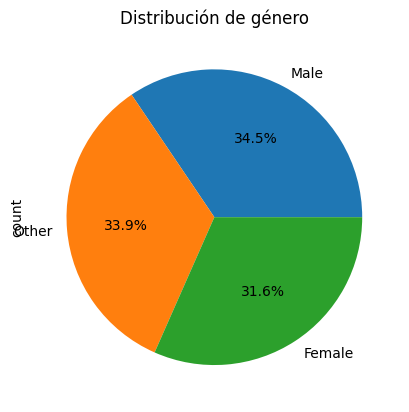

In [15]:
#Para hacer los gráficos, voy a responder preguntas
#1. Como esta dividida la base de datos entre generos
plt.title("Distribución de género")
database_csv['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

Cancer_Type
Breast      657
Colon       642
Prostate    639
Cervical    632
Liver       625
Leukemia    609
Skin        605
Lung        591
Name: count, dtype: int64


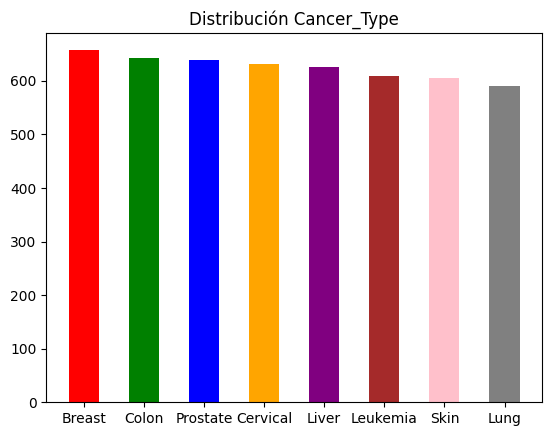

In [16]:
#2. Y los tipos de cancer? 
def count_values(col):
    plt.title(f"Distribución {col}")
    data = database_csv[col]
    categories = data.value_counts().index
    counts = data.value_counts().values
    plt.bar(categories, counts, width=0.5,color=get_colors(len(categories)))
    print(data.value_counts()) 
count_values("Cancer_Type")

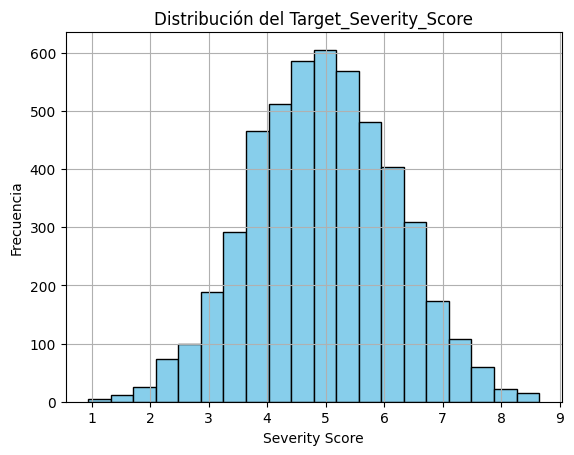

In [17]:
#La severidad del cancer como esta distribuida?
plt.hist(database_clean['Target_Severity_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Target_Severity_Score')
plt.xlabel('Severity Score')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

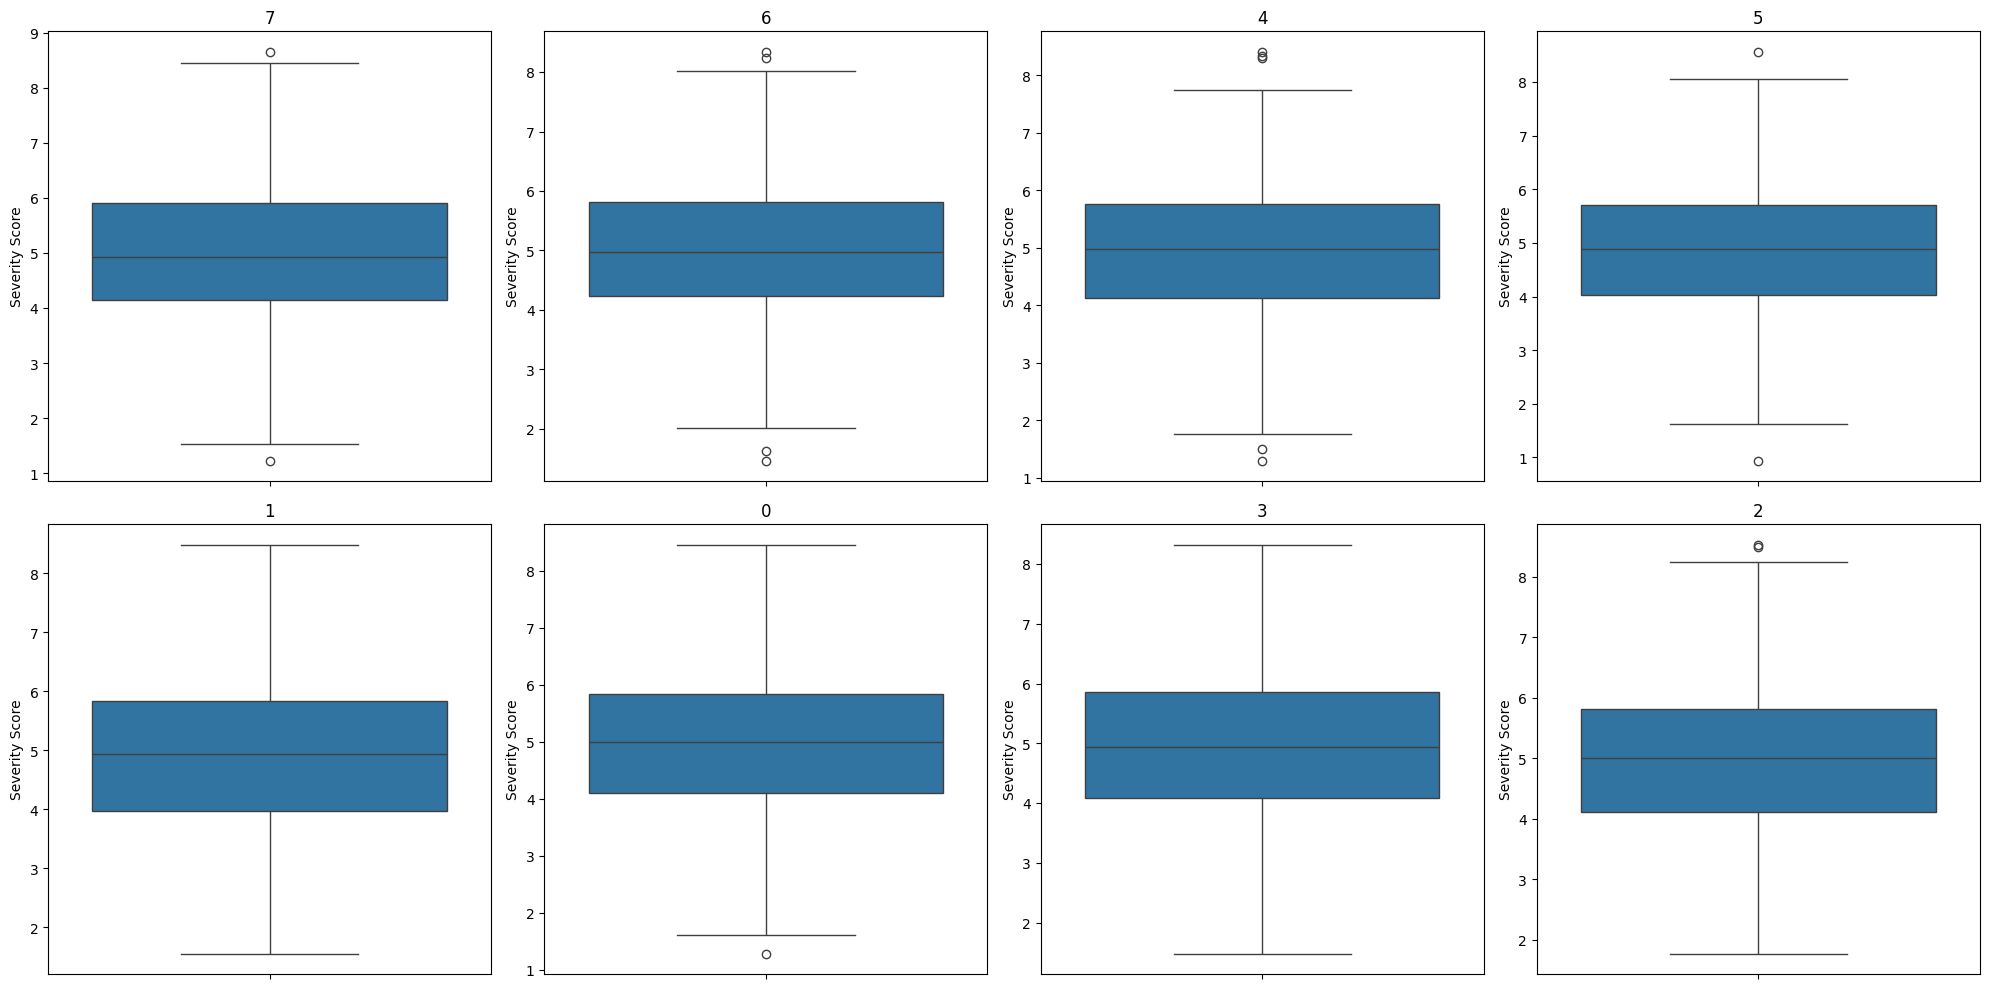

In [18]:
#Hay algunos tipos  de cancer que son más severos que otros en este database?
cancer_types = database_clean.sample(5000)['Cancer_Type'].unique()
cols = 4
rows = 2
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
for i, cancer in enumerate(cancer_types):
    ax = axes[i // cols, i % cols]
    sns.boxplot(data=database_clean[database_clean['Cancer_Type'] == cancer],
            y='Target_Severity_Score', ax=ax)
    ax.set_title(f'{cancer}')
    ax.set_ylabel("Severity Score")
plt.tight_layout()
plt.savefig("./figures/img4.png")
plt.show()

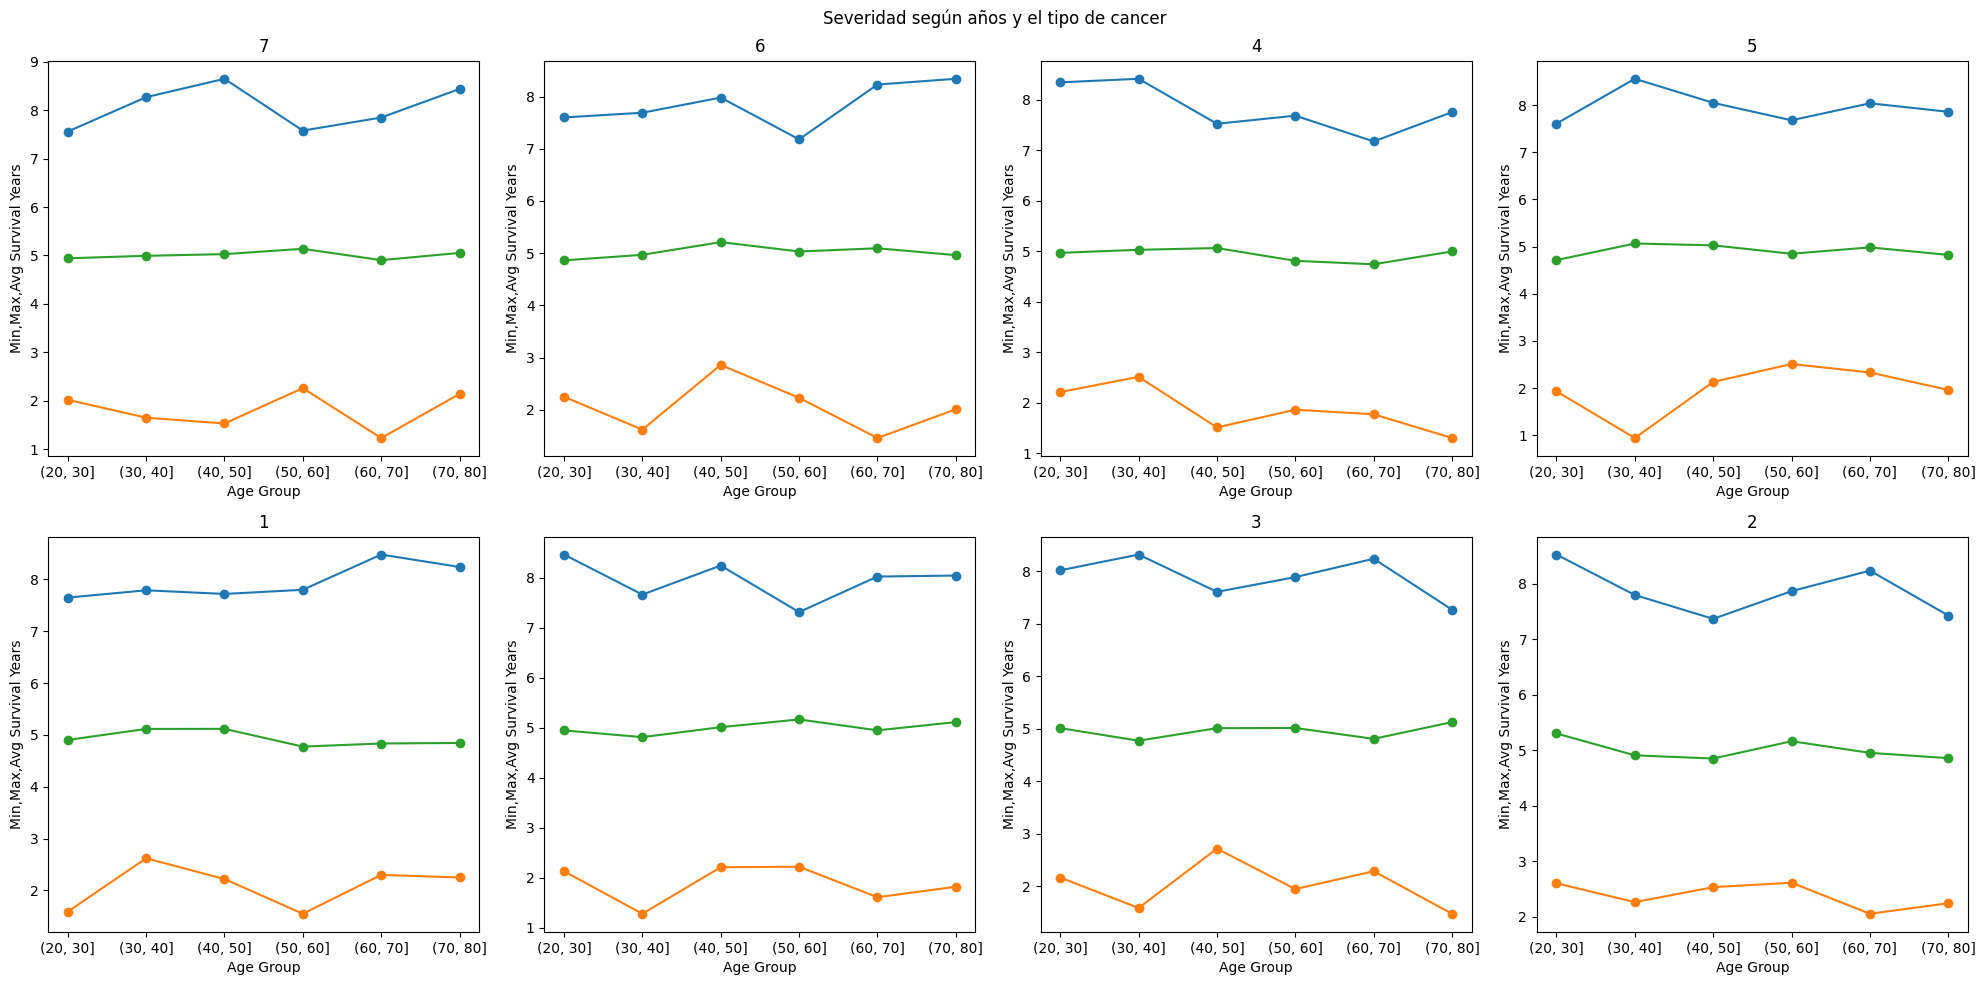

In [19]:
#Y para cada edad agrupada por decadas (de 20 a 30, de 30 a 40,...) la severidad aumenta?
database_clean['Age_Group'] = pd.cut(database_clean['Age'], bins=range(20, 90, 10))
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle("Severidad según años y el tipo de cancer")
for i, cancer in enumerate(cancer_types):
    ax = axes[i // cols, i % cols]
    subset = database_clean[database_clean['Cancer_Type'] == cancer]
    grouped = subset.groupby('Age_Group')['Target_Severity_Score'].max()
    grouped2 = subset.groupby('Age_Group')['Target_Severity_Score'].min()
    grouped3 = subset.groupby('Age_Group')['Target_Severity_Score'].mean()
    grouped.plot(ax=ax, marker='o', title=cancer)
    grouped2.plot(ax=ax, marker='o', title=cancer)
    grouped3.plot(ax=ax, marker='o', title=cancer)
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Min,Max,Avg Survival Years')

plt.tight_layout()
plt.savefig("./figures/img5.png")
plt.show()

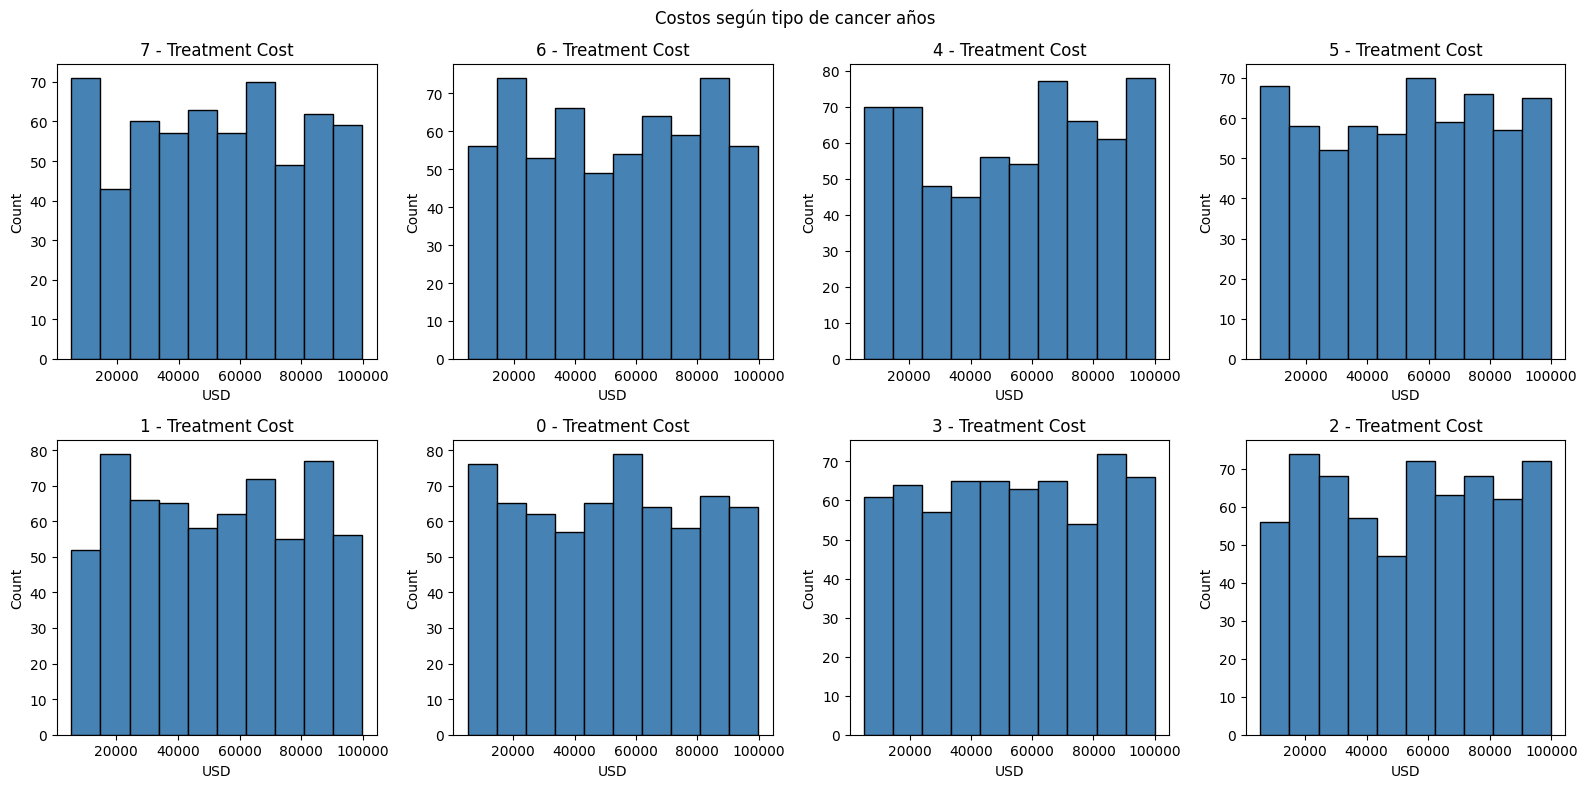

In [20]:
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))

fig.suptitle("Costos según tipo de cancer años")
for i, cancer in enumerate(cancer_types):
    ax = axes[i // cols, i % cols]
    subset = database_clean[database_clean['Cancer_Type'] == cancer]
    ax.hist(subset['Treatment_Cost_USD'], bins=10, color='steelblue', edgecolor='black')
    ax.set_title(f"{cancer} - Treatment Cost")
    ax.set_xlabel('USD')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.savefig("./figures/img6.png")
plt.show()

In [21]:
output_notebook()

source = ColumnDataSource(database_csv)
p = figure(title="Obesidad vs Severidad", x_axis_label="Obesidad", y_axis_label="Severidad", width=700, height=400,y_range=(0, 10),)
p.circle(x='Obesity_Level', y='Target_Severity_Score', source=source, size=5, alpha=0.6)

hover = HoverTool(tooltips=[
    ("Obesidad", "@Obesity_Level"),
    ("Género", "@Gender"),
    ("Tipo Cáncer", "@Cancer_Type"),
    ("Severidad", "@Target_Severity_Score"),
])
p.add_tools(hover)

show(p)

Loading BokehJS ...

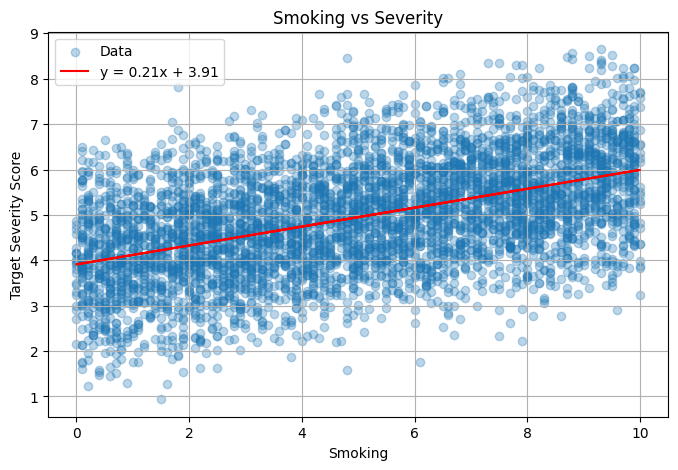

In [22]:
x = database_clean['Smoking']
y = database_clean['Target_Severity_Score']

m, y_i = np.polyfit(x, y, 1)
y_pred = m * x + y_i
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3, label='Data')
plt.plot(x, y_pred, color='red', label=f'y = {m:.2f}x + {y_i:.2f}')
plt.title( 'Smoking vs Severity')
plt.xlabel('Smoking')
plt.ylabel('Target Severity Score')
plt.legend()
plt.grid(True)
plt.show()